# Beauty and the Labour Market

The aim of this assignment is to investigate the relationship between a person's physical attractiveness and their economic success.

## Research Question and Hypothesis:
This research questions if beauty influences a person's economic success''

Null Hypothesis H<sub>o</sub>:
Alternate Hypothesis H<sub>a</sub>: 

## Data Description:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#from statsmodels.formula.api import ols
import numpy as np

%matplotlib inline
sns.set()

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The dataset is loaded in and the variables are examined.

In [2]:
file_path = './beauty and the labor market.csv'
data = pd.read_csv(file_path)
data.head()

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ,Nservice,Slooks
0,5.73,1.745715,0,1,30,4,0,1,0,1,1,0,0,1,1,900,14,0,4
1,4.28,1.453953,0,0,28,3,0,1,0,1,1,1,0,1,0,784,12,1,0
2,7.96,2.074429,0,1,35,4,0,1,0,1,0,0,0,1,0,1225,10,1,0
3,11.57,2.448416,0,0,38,3,0,1,0,0,1,0,1,0,1,1444,16,0,3
4,11.42,2.435366,0,0,27,3,0,1,0,0,1,0,0,1,0,729,16,1,0


 ### Data Source (from Assignment)
19xx Quality of American Life survey (QAL) contains interviews of 1260 respondents. The dataset contains usual labor-market and demographic variables of interest to economists. Most importantly, it contains information on the respondents’ look. In this survey, the interviewer, who visited the respondent in his or her abode, had to rate the respondent’s physical appearance on a five-point scale, along which looks rang from homely to strikingly handsome or beautiful. Because we are interested in investigating the relationship between one’s look and income. It is essential to have a dataset that have information on both productivity-enhancing characteristics (such as education level, working experiences, etc.) and one’s physical attractiveness level.  However, in the dataset, we do not have detailed information on the respondent’s occupation. The only information we know is that if the respondent is in service industry!

In [3]:
# getting an overview of our data
print("Our data has {0} rows and {1} columns".format(data.shape[0], data.shape[1]))

Our data has 1260 rows and 19 columns


In [4]:
data.head(10)

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ,Nservice,Slooks
0,5.73,1.745715,0,1,30,4,0,1,0,1,1,0,0,1,1,900,14,0,4
1,4.28,1.453953,0,0,28,3,0,1,0,1,1,1,0,1,0,784,12,1,0
2,7.96,2.074429,0,1,35,4,0,1,0,1,0,0,0,1,0,1225,10,1,0
3,11.57,2.448416,0,0,38,3,0,1,0,0,1,0,1,0,1,1444,16,0,3
4,11.42,2.435366,0,0,27,3,0,1,0,0,1,0,0,1,0,729,16,1,0
5,3.91,1.363537,0,0,20,3,0,0,0,1,1,0,1,0,0,400,12,1,0
6,8.76,2.170196,0,0,12,3,0,1,0,0,1,0,1,0,0,144,16,1,0
7,7.69,2.039921,0,1,5,4,1,1,0,0,0,0,0,1,0,25,16,1,0
8,5.00,1.609438,0,0,5,3,0,1,0,1,0,0,0,0,0,25,16,1,0
9,3.89,1.358409,0,0,12,3,0,1,0,1,0,0,0,1,0,144,12,1,0


The key variables in the dataset below can be discussed further:
##### wage:
Wages are very significant to this dataset as it is assumed to be a representative of a person's economic success. It is therefore the response variate for the data analysis. The goal here is to see if wages change in a specific way with the change in looks for males and females in and outside of service industry. According to some research (Johnson, Podratz, Dipboyle and Gibbons 2008), attractive females seeking jobs in service indutry get higher wages and likelihood of employement while these same women get rejected while seeking positions in a male-dominated industry. Based on this information, an inital assumption could be made. Wages would be higher for both males and females in service industry where looks are valued more.

##### exper:
Generally higher experience indicates higher wages, irrespective of the industry (Dustman and Meghir 2003, 1). However, experience only increases wages sufficiently if it is backed by higher education(Dustman and Meghir 2003, 1). Thus, higher experinece should increase wages for both males and females but only if they are backed up by higher years of education.

##### looks:
Based off a similar study (Hamermesh & Biddle 1994, 1176), looks that are rated from 1 to 5 can be classified as follows:

| Looks Rating  | Category      | 
| ------------- |:-------------:| 
| 1             | Homely        | 
| 2             | Below Average |   
| 3             | Average       |    
| 4             | Above Average | 
| 5             | Strikingly Attractive |   

It is important to recognize that beauty is subjective and known to change across cultures and time (Hamermesh & Biddle 1994, 1176). Further, the looks were rated by human subjects and these ratings could be affected by biases. This variate is an important explanatory variate in this study.

##### female:
This variable will be used to separately observe interactions between looks and wages. Part of this analysis includes observing differences in wages based on looks for males versus females.

##### service:
This variable is 1 when the person works in a service industry and 0 otherwise. Based on current literature (Johnson, Podratz, Dipboyle and Gibbons 2008), service industry requires employees to engage in human interaction. It is seen that looks play a role in such interactions. For example, attractive salespeople tend to make higher sales than their less attractive counterparts (Samper, Yang and Daniels 2017, 1). This variable will be used to further examine if attractive people in service industry earn higher than their counterparts in the same industry. 

##### educ:

Education to a certain extent influences wages. Thus it will be important to note how it plays a role here in increasing wages.


The table below shows a statistical summary of the dataset. Women form only 35% of the population surveryed for this data. Wages are given as hourly wages (Hammermesh & Biddle 1994, 1179) and the highest wage earned in this dataset is 77.7/hour. The average hourly wage is 6.30. 

In [5]:
data.describe()

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ,Nservice,Slooks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,1.658800,0.123016,0.303968,18.206349,3.185714,0.272222,0.933333,0.073810,0.346032,0.691270,0.174603,0.219048,0.466667,0.273810,474.482540,12.563492,0.726190,0.875397
std,4.660639,0.594508,0.328586,0.460152,11.963485,0.684877,0.445280,0.249543,0.261564,0.475892,0.462153,0.379778,0.413765,0.499086,0.446089,534.645425,2.624489,0.446089,1.474010
min,1.020000,0.019803,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,3.707500,1.310357,0.000000,0.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,12.000000,0.000000,0.000000
50%,5.300000,1.667705,0.000000,0.000000,15.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,225.000000,12.000000,1.000000,0.000000
75%,7.695000,2.040570,0.000000,1.000000,27.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,729.000000,13.000000,1.000000,2.000000
max,77.720001,4.353113,1.000000,1.000000,48.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,17.000000,1.000000,5.000000


It is interesting to note that when the dataset is sorted in a descending order by `wage` and `looks`, the highest earning person is a female in the service industry. However, the next top nine positions for highest wages are all male with looks that are mostly rated 3. They are also not necessarily in the service industry.

In [6]:
data.sort_values(['wage', 'looks'],ascending=[False, False], inplace=True)
data.head(10)

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ,Nservice,Slooks
602,77.720001,4.353113,0,1,9,4,1,1,1,1,1,0,1,0,1,81,13,0,4
269,41.669998,3.729781,0,1,16,4,0,0,0,0,1,0,0,1,0,256,13,1,0
415,38.860001,3.659966,0,0,29,3,0,1,0,0,1,0,0,1,0,841,13,1,0
69,32.790001,3.490124,0,1,33,4,0,1,0,0,1,0,0,1,1,1089,16,0,4
290,31.090000,3.436886,0,0,32,3,0,0,0,0,1,0,0,1,0,1024,13,1,0
68,29.980000,3.400531,0,0,12,3,0,1,0,0,1,0,0,1,1,144,17,0,3
299,26.240000,3.267285,0,0,24,3,0,1,0,0,1,0,1,0,0,576,12,1,0
1113,26.240000,3.267285,0,0,37,3,0,1,0,0,1,0,0,0,0,1369,12,1,0
1108,26.240000,3.267285,1,0,37,2,0,1,0,0,1,0,0,0,0,1369,12,1,0
396,26.219999,3.266522,0,0,17,3,0,1,0,0,1,0,1,0,1,289,17,0,3


The table below shows a count of the number of males (0) and females (1) for each look. Interestingy, more males are rated 4 and 5 compared to females. This sort of number could be due to biases during the rating with more females possibly rating than males. But the number of males in this sample are almost double that of females which could result in this difference. 

In [7]:
count_looks = pd.crosstab(data['female'], data['looks'],margins=True)
count_looks

looks,1,2,3,4,5,All
female,,,,,,
0,8,88,489,228,11,824
1,5,54,233,136,8,436
All,13,142,722,364,19,1260


To overcome the differences in numbers due to higher counts of males in the dataset, the table below shows the same results in percentages. Now, it is clear that most males and females are rated `3` which can be considered `average`. However, females have higher ratings in the top two ranks of looks (4 and 5) over the males. Females are rated `strikingly attractive` by a minutely small percentage of `0.005%` than males and considered `above average` by a percentage of `0.04%` over males.

In [8]:
def percConvert(ser):
    return ser/float(ser[-1])

pd.crosstab(data['female'], data['looks'],margins=True).apply(percConvert, axis=1)

looks,1,2,3,4,5,All
female,,,,,,
0,0.009709,0.106796,0.593447,0.276699,0.013350,1.0
1,0.011468,0.123853,0.534404,0.311927,0.018349,1.0
All,0.010317,0.112698,0.573016,0.288889,0.015079,1.0


To answer the most basic question of whether looks influence wages, the table and graph below show that wages indeed increase for those with higher rated looks. 

In [9]:
looks = pd.pivot_table(data, index= ['looks'], values= "wage")
looks

,wage
looks,
1,4.621538
2,5.328803
3,6.504598
4,6.299341
5,7.388421


Text(0,0.5,'wages')

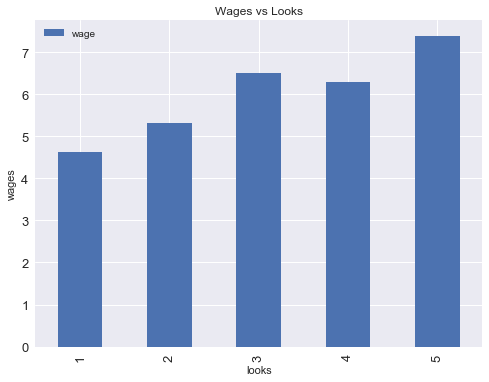

In [10]:
looks.plot(kind='bar', figsize=[8,6], title='Wages vs Looks', fontsize=13)
plt.ylabel('wages')

The change in average wage across all levels of `looks` for males and females both within and outside the service industry are compared. The table below shows two points of significance:
* For males, wages increase with looks in both service and non-service industries. Further, <strong> for males in the service industry, the hourly wage doubles for males rated 5 in `looks`. </strong>
* For females, there seems to be no clear evidence of higher wages associated with better looks. And this holds for females in and outside of the service industry.

These results are evident in the tables below. 

In [11]:
service_looks = pd.pivot_table(data, index= ['female','service','looks'], values= "wage")
service_looks

wage
female service looks           
0      0       1       5.851429
               2       6.280423
               3       7.636250
               4       7.262557
               5       8.385000
       1       1       8.350000
               2       6.118235
               3       7.411111
               4       7.104231
               5      14.026667
1      0       1       1.755000
               2       3.413214
               3       4.010231
               4       3.998608
               5       4.501667
       1       1       2.420000
               2       4.276923
               3       4.457282
               4       5.779649
               5       2.105000

Just comparing average hourly wages across all levels of average education years shows an expected trend - those with higher average education years have higher average hourly wages. This is seen in the table and graph below.

In [12]:
education_wage = pd.pivot_table(data, index = ['educ'], values='wage')
education_wage

,wage
educ,
5,4.587857
8,4.969091
10,5.524295
12,5.698205
13,6.642642
14,5.613529
16,7.792645
17,8.661061


Text(0,0.5,'wages')

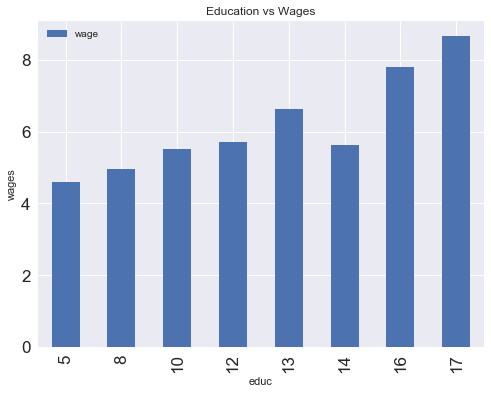

In [13]:
education_wage.plot(kind='bar', figsize=[8,6], title='Education vs Wages', fontsize=17)
plt.ylabel('wages')

## Empirical Analysis

According to Hamermesh and Biddle (1994), holding labour market and demographic factors constant, attractive people are paid higher than their less attractive counterparts. Using a similar dataset, Hamermesh and Biddle get individuals rated from 1 to 5:

| Looks Rating  | Category      | 
| ------------- |:-------------:| 
| 1             | Homely        | 
| 2             | Below Average |   
| 3             | Average       |    
| 4             | Above Average | 
| 5             | Strikingly Attractive |  

They model looks-based differences in labor-market outcomes and assume that in at least some occupations attractive workers are more productive than unattractive ones. Using three sets of household data, they find some evidence of a positive impact of workers' looks on their earnings. Further, wages of people with below-average looks are lower than those of average-looking workers; and there is a premium in wages for good-looking people that is slightly smaller than this penalty. There is also some evidence that the labor market sorts the best-looking people into occupations where their looks are productive. 

Conversly, in the study by Johnson, Podratz, Dipboyle and Gibbons (2009), the goal is to see if percieved attractiveness benefits the person across various occupations. The “what is beautiful is good” statement implies that attractive people benefit from their looks in perceptions of employment suitability. Conversely, the “beauty is beastly” effect suggests that attractiveness can be detrimental to women in certain employment contexts. They found that attractiveness can be detrimental for women applying for masculine sex-typed jobs for which physical appearance is perceived as unimportant.

Due to the direct results of looks on wages, wage discrimination arises. Liu and Sierminska (2014) find that an important determinant of wage discrimination is the way the labor market rewards physical attractiveness. In their study, they survey the extensive empirical literature of the effect of physical attractiveness on labor market outcomes. The hiring process itself is examined. There are two reasons employers might hire more attractive workers. The first is based on a belief that good-looking workers are more productive or more capable. The second is that employers prefer to work with good-looking workers even when they do not have a biased
belief about the workers actual ability.

Pfann, Biddle, Hamermesh and Bosman state that physically attractive workers are more productive than unattractive ones in some occupations, such as actors, sales assistants and waiters. These occupations involve extensive interaction between workers and customers. This could lead to an advantage during customer discrimination
with customers preferring to interact with better-looking workers. Moreover, physical attractiveness may enhance workers’ ability to engage in productive interaction with co-workers. Good working relationship with co-workers and the firm’s clients can create a form of firm-specific human capital, which generates higher earnings for workers themselves and higher income for their employers.

The basic model as a benchmark would involve measuring wages with just looks. 

wage = &beta;<sub>0</sub> + &beta;<sub>1</sub>look + e

In [20]:
benchmark_model = ols(formula='wage ~ looks', data = data).fit()
print(benchmark_model.params)
print(benchmark_model.summary())

Intercept    5.113931
looks        0.374409
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.820
Date:                Wed, 28 Mar 2018   Prob (F-statistic):             0.0509
Time:                        13:06:14   Log-Likelihood:                -3724.8
No. Observations:                1260   AIC:                             7454.
Df Residuals:                    1258   BIC:                             7464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

The correlation coefficient of 0.05 indicates a positive relationship betwen `wage` and `looks`.

In [17]:
np.corrcoef(data['wage'], data['looks'])[0,1]

0.05501908986049157

### References:
* Physical Attractiveness Biases in Ratings of Employment Suitability: Tracking Down the “Beauty is Beastly” Effect
* http://www.christiandustmann.com/content/4-research/68-wages-experience-and-seniority/dustmann_meghir_2005_restud.pdf
* https://wiwi.uni-paderborn.de/fileadmin/dep1ls6/Research/Beauty_and_the_Labor_Market_Hamermesh_Biddle.pdf
* Beauty, Effort, and Misrepresentation: How Beauty Work Affects Judgments of Moral Character and Consumer Preferences
* Evaluating the Effect of Beauty on Labor Market Outcomes: A Review of the Literature
* Gerard A Pfann, Jeff E Biddle, Daniel S Hamermesh, and Ciska M Bosman. Business success and businesses’ beauty capital. Economics Letters, 67(2):201–207, 2000.

Future potential questions:
* beauty across countries
* beauty across occupations
* [beauty vs personality traits](http://ftp.iza.org/dp8526.pdf)